In [35]:
import numpy as np
import pandas as pd
import xarray as xr
import os

import matplotlib 
% matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
path = 'Data'

In [23]:
electricity_load = pd.read_csv(os.path.join(path, 'SumProfiles.Electricity.csv'), sep=';', header = None, usecols=[1,2])

In [24]:
electricity_load = electricity_load.rename({1 : 'timestamp', 2 : 'baseload'}, axis = 1)


In [25]:
electricity_load['timestamp'] = pd.to_datetime(electricity_load.timestamp, format='%d.%m.%Y %H:%M')

In [26]:
electricity_load.set_index('timestamp', inplace = True)

In [27]:
electricity_load['date'] = electricity_load.index.date
electricity_load['hour'] = electricity_load.index.hour
electricity_load['minute'] = (np.floor(electricity_load.index.minute/10) * 10).astype(int)

In [28]:
electricity_load = electricity_load.reset_index().set_index(['date','hour', 'minute'])

In [29]:
hourly_aggreg = electricity_load.groupby(['date','hour']).sum()
hourly_aggreg = hourly_aggreg.reset_index()

In [30]:
minute_aggreg = electricity_load.groupby(['date','hour','minute']).sum()
minute_aggreg = minute_aggreg.reset_index()

In [31]:
hourly_aggreg['timestamps'] = pd.to_datetime(hourly_aggreg.date) + pd.to_timedelta(hourly_aggreg.hour, unit = 'h')
minute_aggreg['timestamps'] = (pd.to_datetime(minute_aggreg.date) 
                            +  pd.to_timedelta(minute_aggreg.hour, unit = 'h')
                            +  pd.to_timedelta(minute_aggreg.minute, unit = 'm'))



In [37]:
start_date = '20160701'
end_date = '20160731'

In [32]:
baseload_10min = minute_aggreg.set_index('timestamps').baseload
baseload_hourly = hourly_aggreg.set_index('timestamps').baseload

In [51]:
# MAKE AUGUST DATA
baseload_10min_select = baseload_10min[start_date:end_date]
baseload_hourly_select = baseload_hourly[start_date:end_date]

<IPython.core.display.Javascript object>


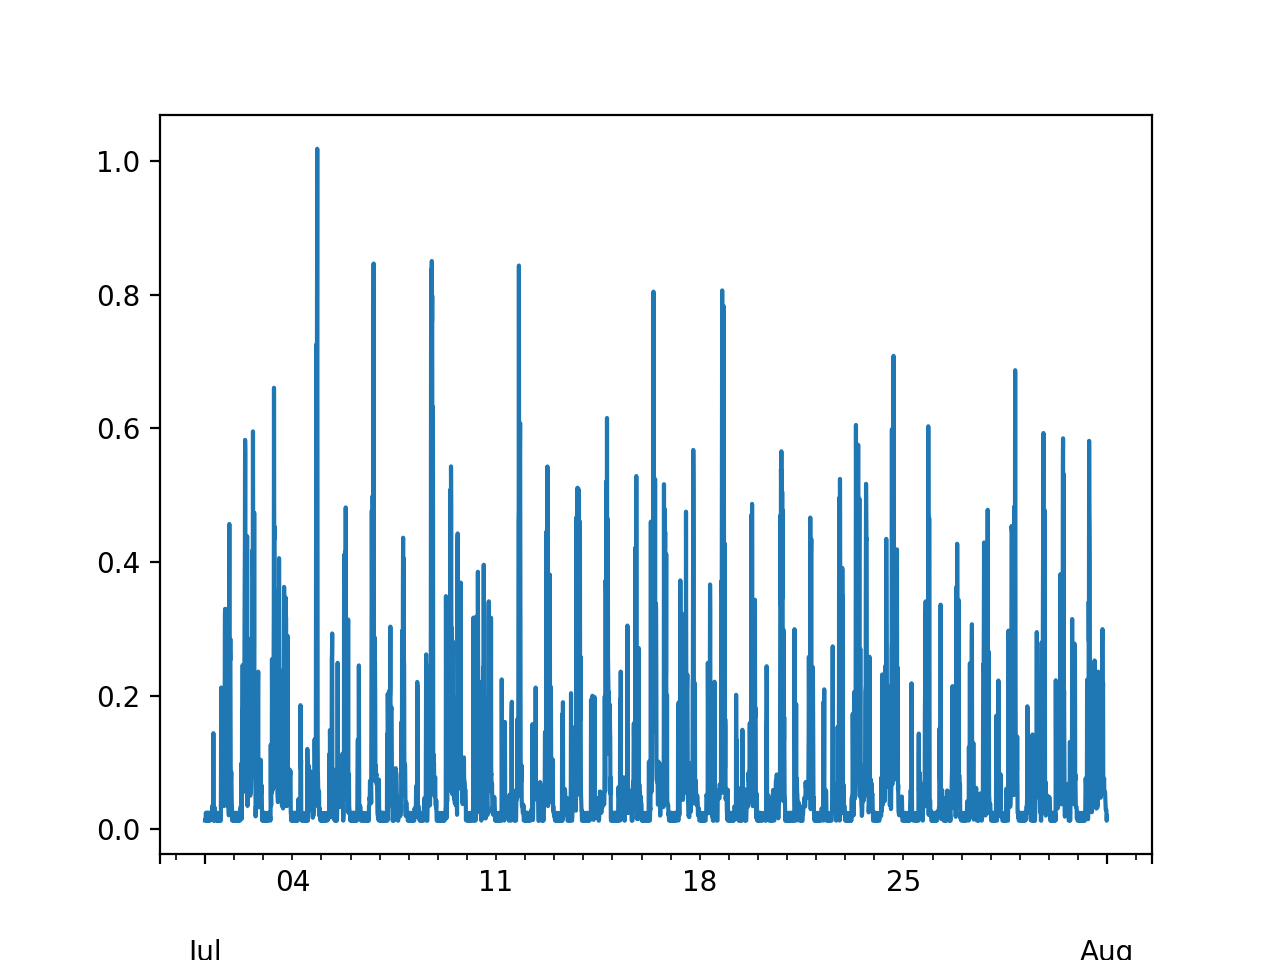

In [52]:
baseload_10min_select.plot()
plt.show()

In [54]:
baseload_10min_select.to_csv(os.path.join(path, 'baseload_aug_10min.csv'))
baseload_hourly_select.to_csv(os.path.join(path, 'baseload_aug_hourly.csv'))